# 2) 카페 데이터 분석 (위치 고려, 카페 밀집 지역 도출) - 수민


## 공유컵 사업 참여 추천 지역, 범위 설정
  ### 1) 매출+인구 고려 - 상권 데이터
        매출이 높고 인구가 많은 상권을 알아내자!
            - 유동인구 고려하는 이유: 테이크 아웃 인원 파악 위함
            - 20/30대 매출 건수, (생활인구 또는) 직장인구 데이터 사용
   - 1-1) 클러스터링 진행 - 거리가 가까운 상권의 경우를 클러스터링 해서, 값을 합쳐 새로운 행을 생성. (지헌) 
   - 1-2) 클러스터링 진행 - 매출과 인구를 고려한 클러스터링 (상은)
   - **추천 상권 도출
        
  ### 2) 위치+밀집도 고려 - 소상공인 카페 데이터
        카페 밀집도가 높은 지역 (가까운 거리 안에, 많은 카페가 존재하는) 을 알아내자!
        
   - 2-1) 클러스터링 진행 - 위치와 밀집도 고려해서 카페 밀집된 구역 추천 (수민)
   - **추천 지역 도출
        
        
#### ⇒  결론: 두 고려사항을 충족하는 지역 = 공유컵 시행 최적 지역 을 찾기 위함

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import datetime
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

colors = ['red','orange','green','skyblue','blue','navy','purple','pink','olive','brown','gray','cyan','lightgreen','salmon','violet','orchid'
         ,'magenta','yellow','lime','limegreen','linen','maroon','mediumaquamarine','aquamarine','lawngreen']
EPS = [0.0001,0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.05,0.1,0.5]

# 1.데이터 준비
## 1) 데이터 확인

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트/데이터분석 공모전/2021 공공빅데이터 공모전/cup_sharing/소상공인시장진흥공단_상가(상권)정보_서울_202106.csv',encoding='cp949')
df.head(1)

상가업소번호  상호명  지점명 상권업종대분류코드 상권업종대분류명  ...  동정보 층정보 호정보          경도         위도
0  17174175  비지트  NaN         Q       음식  ...  NaN   1 NaN  126.991394  37.488375

[1 rows x 39 columns]

In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
df.상권업종중분류명.unique()

array(['한식', '가정/주방/인테리어', '의복의류', '건강/미용식품', '취미/오락관련소매', '학원-보습교습입시',
       '사진/광학/정밀기기소매', '유흥주점', '학원-창업취업취미', '자동차/자동차용품', '부동산중개',
       '도서관/독서실', '커피점/카페', '패스트푸드', '무도/유흥/가무', '주유소/충전소', '종합소매점',
       '닭/오리요리', '자동차/이륜차', 'PC/오락/당구/볼링등', '음/식료품소매', '세탁/가사서비스',
       '선물/팬시/기념품', '이/미용/건강', '사무/문구/컴퓨터', '화장품소매', '기타서비스업', '시계/귀금속소매',
       '가방/신발/액세서리', '가전제품소매', '운동/경기용품소매', '학원-예능취미체육', '학원기타', '일식/수산물',
       '물품기기대여', '제과제빵떡케익', '학문교육기타', '분식', '양식', '사진', '애견/애완/동물',
       '학원-음악미술무용', '대행업', '주택수리', '철물/난방/건설자재소매', '별식/퓨전요리', '모텔/여관/여인숙',
       '호텔/콘도', '의약/의료품소매', '학원-어학', '유아교육', '인력/고용/용역알선', '책/서적/도서',
       '기타음식업', '광고/인쇄', '가구소매', '유아용품', '개인/가정용품수리', '운송/배달/택배',
       '예식/의례/관혼상제', '요가/단전/마사지', '실내운동시설', '운영관리시설', '법무세무회계', '부페',
       '기타판매업', '연극/영화/극장', '개인서비스', '평가/개발/관리', '장례/묘지', '중식', '분양',
       '중고품소매/교환', '대중목욕탕/휴게', '예술품/골동품/수석/분재', '페인트/유리제품소매',
       '학원-자격/국가고시', '스포츠/운동', '음식배달서비스', '종교용품판매', '경마/경륜/성인오락',
       '행사/이벤트', '민박/하숙', '학원

## 2)데이터 정제
### 2-1) 개인 카페로 한정

In [ ]:
cafe_df = df[df.상권업종중분류명 == '커피점/카페']
cafe_df.head(1)

상가업소번호  상호명          지점명 상권업종대분류코드  ... 층정보 호정보          경도         위도
28  20659878  커피빈  코리아대학로대명거리점         Q  ...   3 NaN  127.000171  37.583149

[1 rows x 39 columns]

In [ ]:
cafe_df.상권업종소분류명.unique()

array(['커피전문점/카페/다방', '보드게임카페', '생과일주스전문점', '전통찻집/인삼찻집', '사주카페', '애견카페'],
      dtype=object)

In [ ]:
cafe_df = cafe_df[cafe_df.상권업종소분류명.isin(['커피전문점/카페/다방','생과일주스전문점','전통찻집/인삼찻집'])]

In [ ]:
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 28 to 315945
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     20718 non-null  int64  
 1   상호명        20718 non-null  object 
 2   지점명        7409 non-null   object 
 3   상권업종대분류코드  20718 non-null  object 
 4   상권업종대분류명   20718 non-null  object 
 5   상권업종중분류코드  20718 non-null  object 
 6   상권업종중분류명   20718 non-null  object 
 7   상권업종소분류코드  20718 non-null  object 
 8   상권업종소분류명   20718 non-null  object 
 9   표준산업분류코드   19352 non-null  object 
 10  표준산업분류명    19352 non-null  object 
 11  시도코드       20718 non-null  int64  
 12  시도명        20718 non-null  object 
 13  시군구코드      20718 non-null  int64  
 14  시군구명       20718 non-null  object 
 15  행정동코드      20718 non-null  int64  
 16  행정동명       20715 non-null  object 
 17  법정동코드      20718 non-null  int64  
 18  법정동명       20718 non-null  object 
 19  지번코드       20718 non-null  int64  
 20  대지구분

### 2-2) 위치를 기반으로 한 클러스터링이므로, 필요한 위도/경도 그리고 혹시모를 지점명과 지번주소만 가져와서 데이터셋을 새로 생성

In [ ]:
colums = ['상호명','지점명','시군구명','지번주소','위도','경도']
cafe = cafe_df[colums].reset_index()
cafe.head(2)

index    상호명          지점명 시군구명               지번주소         위도          경도
0     28    커피빈  코리아대학로대명거리점  종로구  서울특별시 종로구 명륜4가 51  37.583149  127.000171
1    111  요거프레소          쌍문점  도봉구   서울특별시 도봉구 쌍문동 20  37.658728  127.034746

In [ ]:
cafe.fillna('',inplace=True)

In [ ]:
cafe['상호지점명'] = cafe['상호명'] + cafe['지점명']

In [ ]:
cafe.head()

index    상호명          지점명  ...         위도          경도           상호지점명
0     28    커피빈  코리아대학로대명거리점  ...  37.583149  127.000171  커피빈코리아대학로대명거리점
1    111  요거프레소          쌍문점  ...  37.658728  127.034746        요거프레소쌍문점
2    190  메머드커피               ...  37.554599  126.929692           메머드커피
3    197  우성커피숍               ...  37.522055  126.842935           우성커피숍
4    225   카페클럽               ...  37.488907  127.122480            카페클럽

[5 rows x 8 columns]

In [ ]:
fc = pd.pivot_table(data = cafe, index='상호명',values='지번주소',aggfunc='count').sort_values(by='지번주소', ascending=False).reset_index()

In [ ]:
fc.head(10)

상호명  지번주소
0       카페   402
1    이디야커피   367
2     스타벅스   331
3   투썸플레이스   165
4      커피빈   115
5  메가엠지씨커피   103
6       공차   102
7     커피베이   101
8    할리스커피    96
9   커피에반하다    96

In [ ]:
fc_list = [x for x in fc[:50].상호명]
fc_list.remove('카페')
fc_list.remove('까')
fc_list.remove('나')
fc_list.remove('명칭없음')
fc_list.append('커핀그루나루')
fc_list.append('홈스테드')
fc_list.append('디저트39')
fc_list.append('보나비아티제')
fc_list.append('커피볶는집')
fc_list.append('메머드커피')
len(fc_list)

52

In [ ]:
cafe = cafe[~cafe.상호지점명.str.contains('|'.join(fc_list))]

In [ ]:
pd.pivot_table(data = cafe, index='상호명',values='지번주소',aggfunc='count').sort_values(by='지번주소', ascending=False).reset_index().head()

상호명  지번주소
0    카페   402
1     까    32
2  명칭없음    20
3     나    20
4  커피코트    18

In [ ]:
gu_cafe = pd.pivot_table(data = cafe, index='시군구명',values='지번주소',aggfunc='count').sort_values(by='지번주소').reset_index()

In [ ]:
gu_cafe

시군구명  지번주소
0    강북구   251
1    도봉구   305
2    금천구   355
3    중랑구   371
4   동대문구   390
5    양천구   425
6    동작구   441
7    구로구   470
8    노원구   474
9    은평구   499
10   성북구   535
11   성동구   562
12   관악구   607
13  서대문구   607
14   강동구   643
15   광진구   651
16   용산구   667
17    중구   708
18   송파구   821
19   강서구   825
20  영등포구   865
21   종로구   940
22   서초구  1077
23   마포구  1223
24   강남구  1988

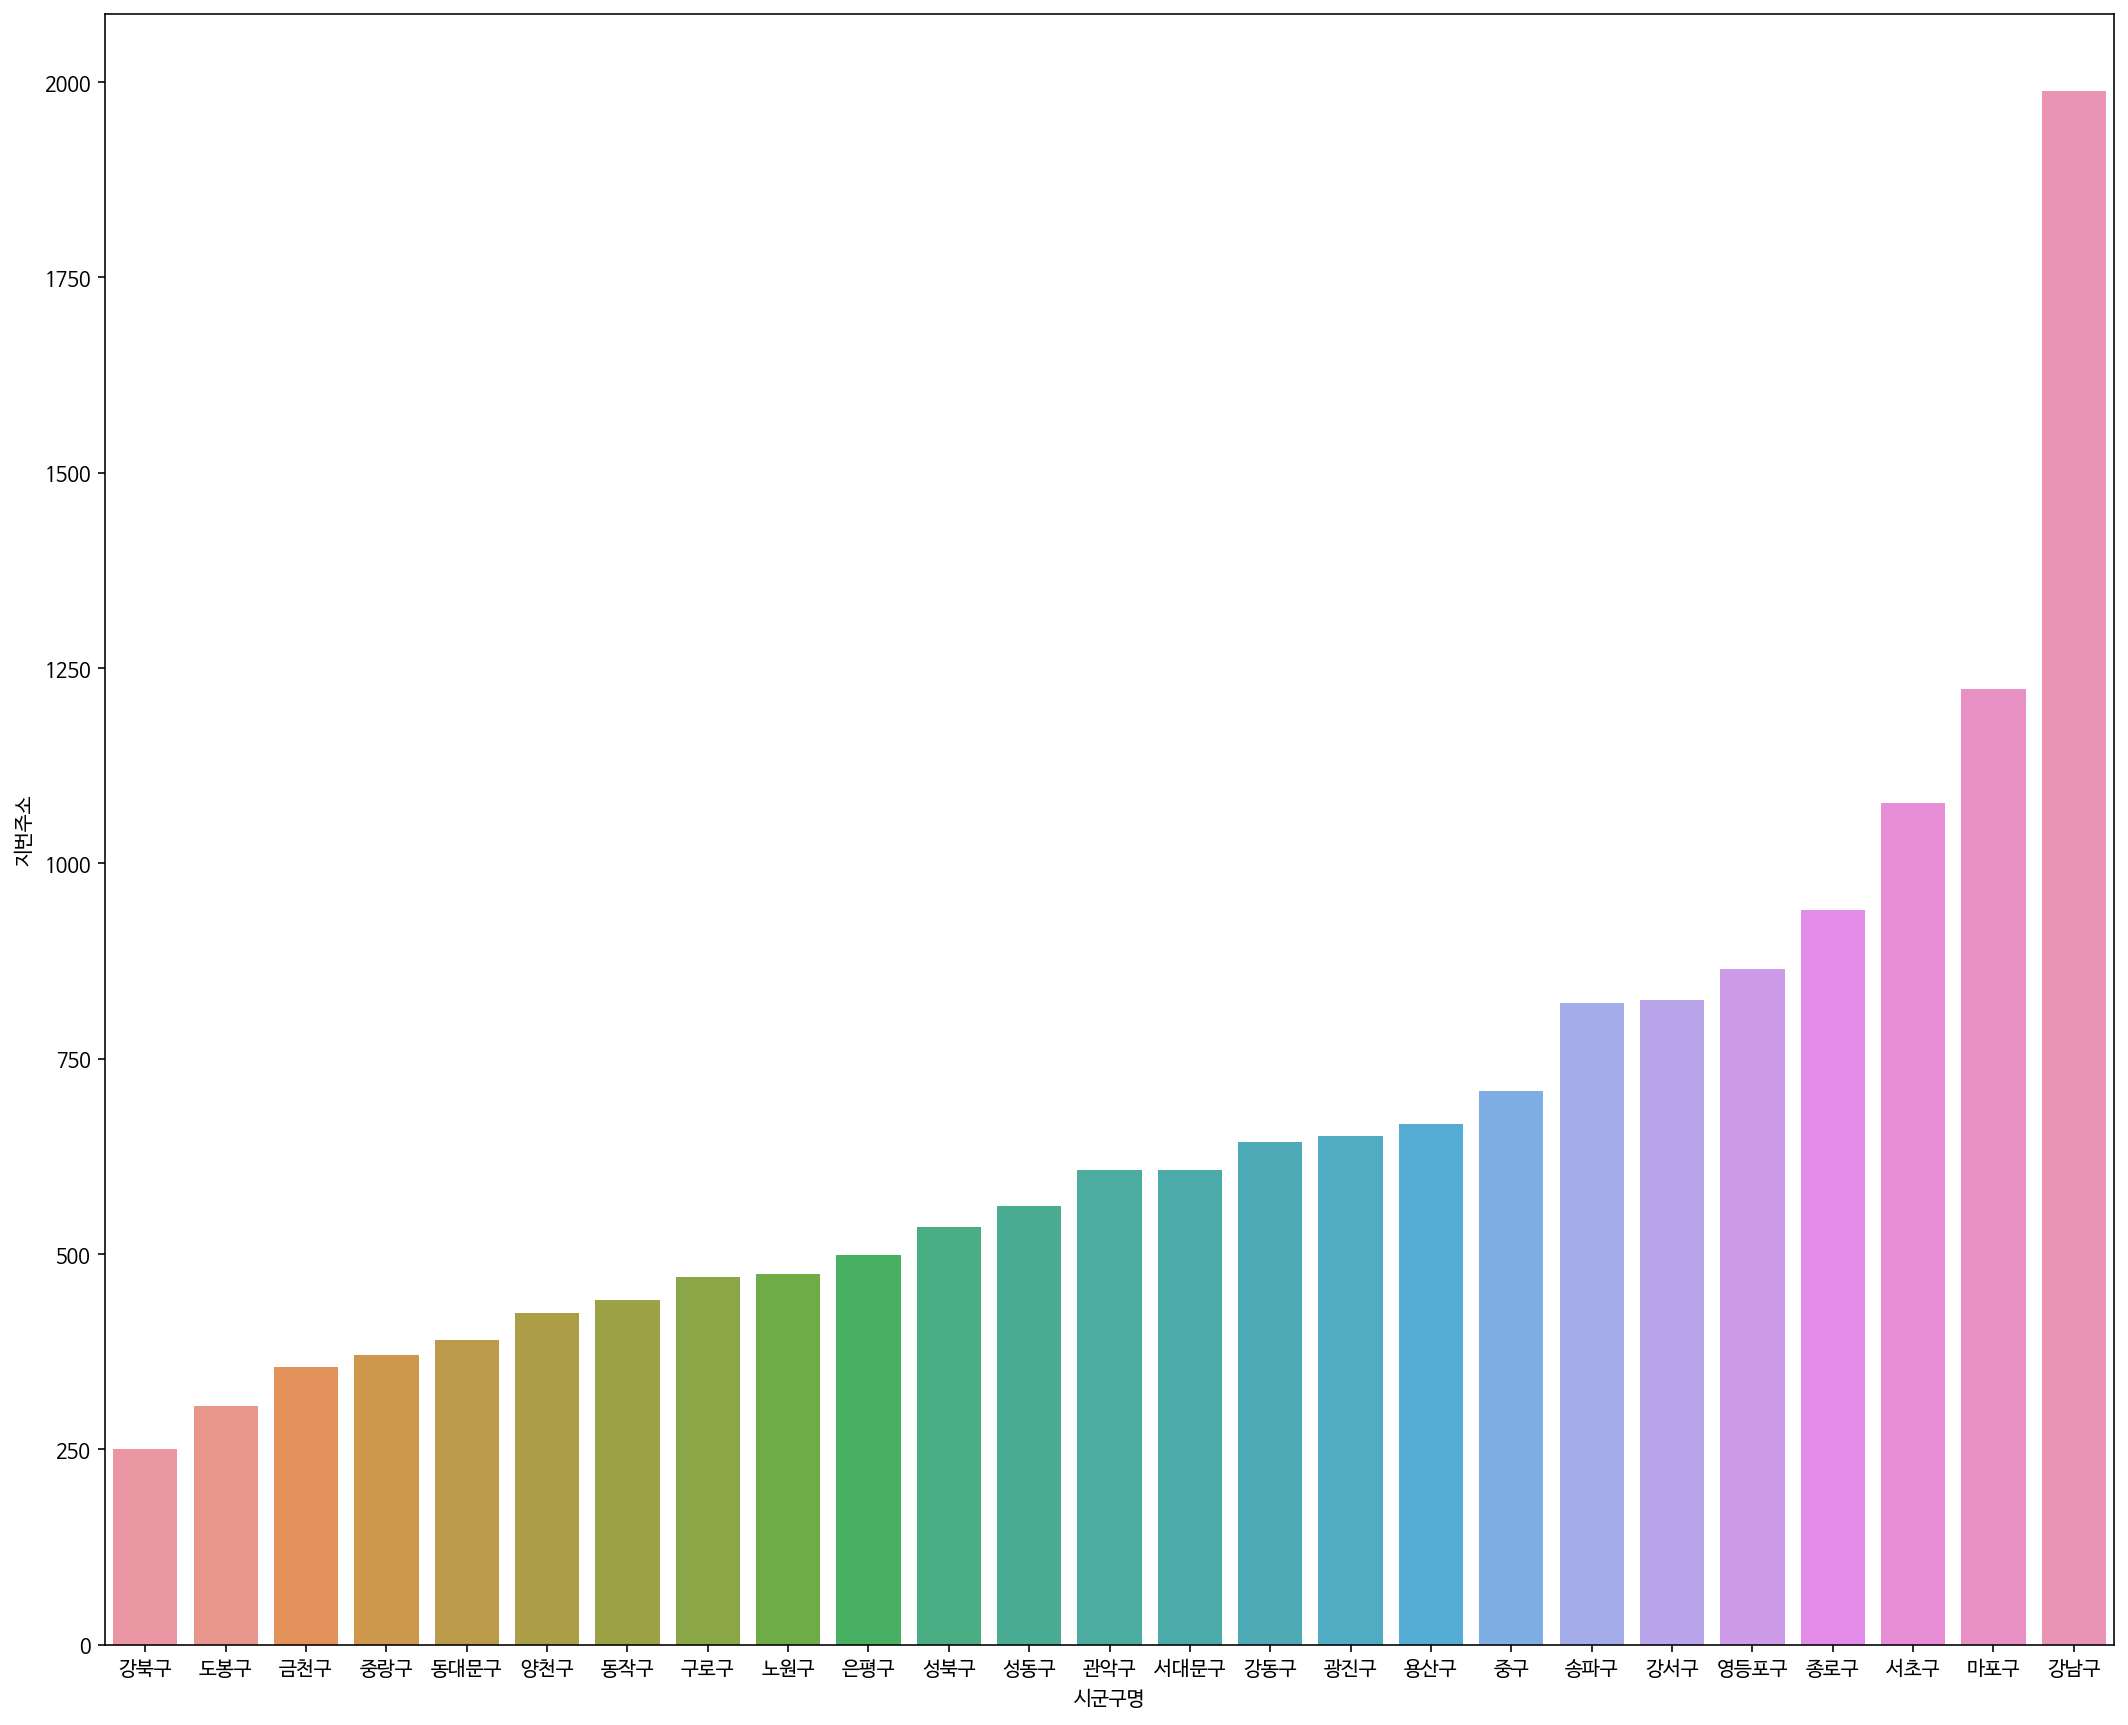

In [ ]:
plt.figure(figsize = (18,15))

sns.barplot(data = gu_cafe, x='시군구명',y='지번주소')

프랜차이즈 제거 후에도 강남구가 압도적으로 많음. 

# 2. 클러스터링 
## DBSCAN

### Test1

In [ ]:
x_df = cafe[['위도','경도']]

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.005, min_samples=50, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x_df)

dbscan_labels

array([-1,  0,  1, ...,  7, -1,  4])

In [ ]:
columns = ['상호명','지점명','시군구명','지번주소','위도','경도']

In [ ]:
test1 = cafe[columns]
test1['test1_label'] = dbscan_labels
test1.head()

상호명  지점명 시군구명                  지번주소         위도          경도  test1_label
3   우성커피숍       양천구   서울특별시 양천구 신월동 514-2  37.522055  126.842935           -1
4    카페클럽       송파구    서울특별시 송파구 문정동 43-6  37.488907  127.122480            0
5    띵낑커피       광진구    서울특별시 광진구 화양동 9-44  37.542182  127.068840            1
8   로얄커피숍       강동구   서울특별시 강동구 성내동 132-5  37.534901  127.124193            2
9  빈트리망원점  망원점  마포구  서울특별시 마포구 망원동 418-22  37.556041  126.899339            4

In [ ]:
fig = px.scatter(test1, 
                 title="Test1", 
                 x="경도", 
                 y="위도",
                 color = 'test1_label')
fig.show()

### Test2

In [ ]:
dbscan = DBSCAN(eps=0.005, min_samples=100, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x_df)

test2 = cafe[columns]
test2['test2_label'] = dbscan_labels
test2.reset_index(inplace=True)

test2.head()

index     상호명  지점명  ...         위도          경도  test2_label
0      3   우성커피숍       ...  37.522055  126.842935           -1
1      4    카페클럽       ...  37.488907  127.122480           -1
2      5    띵낑커피       ...  37.542182  127.068840            0
3      8   로얄커피숍       ...  37.534901  127.124193           -1
4      9  빈트리망원점  망원점  ...  37.556041  126.899339           -1

[5 rows x 8 columns]

In [ ]:
fig = px.scatter(test2, 
                 title="Test2", 
                 x="경도", 
                 y="위도",
                 color = 'test2_label')
fig.show()

min_sample수 조절 결과 다른 결과가 나온 것을 알 수 있음.  
밑의 결과가 범위 내에 더 많은 카페들이 몰려있다고 볼 수 있다고 이해했기 때문에 둘 중에 고르라면 밑의 클러스터링 결과가 더 유용할 듯  
**eps와 min_sample 수 결정 근거 필요**

## epsilon selection

In [ ]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 100
X_embedded = cafe[['위도','경도']]
# X_embedded is your data
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_embedded)
distances, indices = nbrs.kneighbors(X_embedded)

distance_desc = np.sort(distances, axis=0)
distance_desc = distance_desc[:,1]
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

### Test3

In [ ]:
dbscan = DBSCAN(eps=0.004, min_samples=100, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x_df)

test3 = cafe[columns]
test3['test3_label'] = dbscan_labels

fig = px.scatter(test3, 
                 title="Test3", 
                 x="경도", 
                 y="위도",
                 color = 'test3_label')
fig.show()

### Test4

In [ ]:
# elbow point
dbscan = DBSCAN(eps=0.0035, min_samples=100, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x_df)

test4 = cafe[columns]
test4['test4_label'] = dbscan_labels

fig = px.scatter(test4, 
                 title="Test4", 
                 x="경도", 
                 y="위도",
                 color = 'test4_label')
fig.show()

## 결과 해석

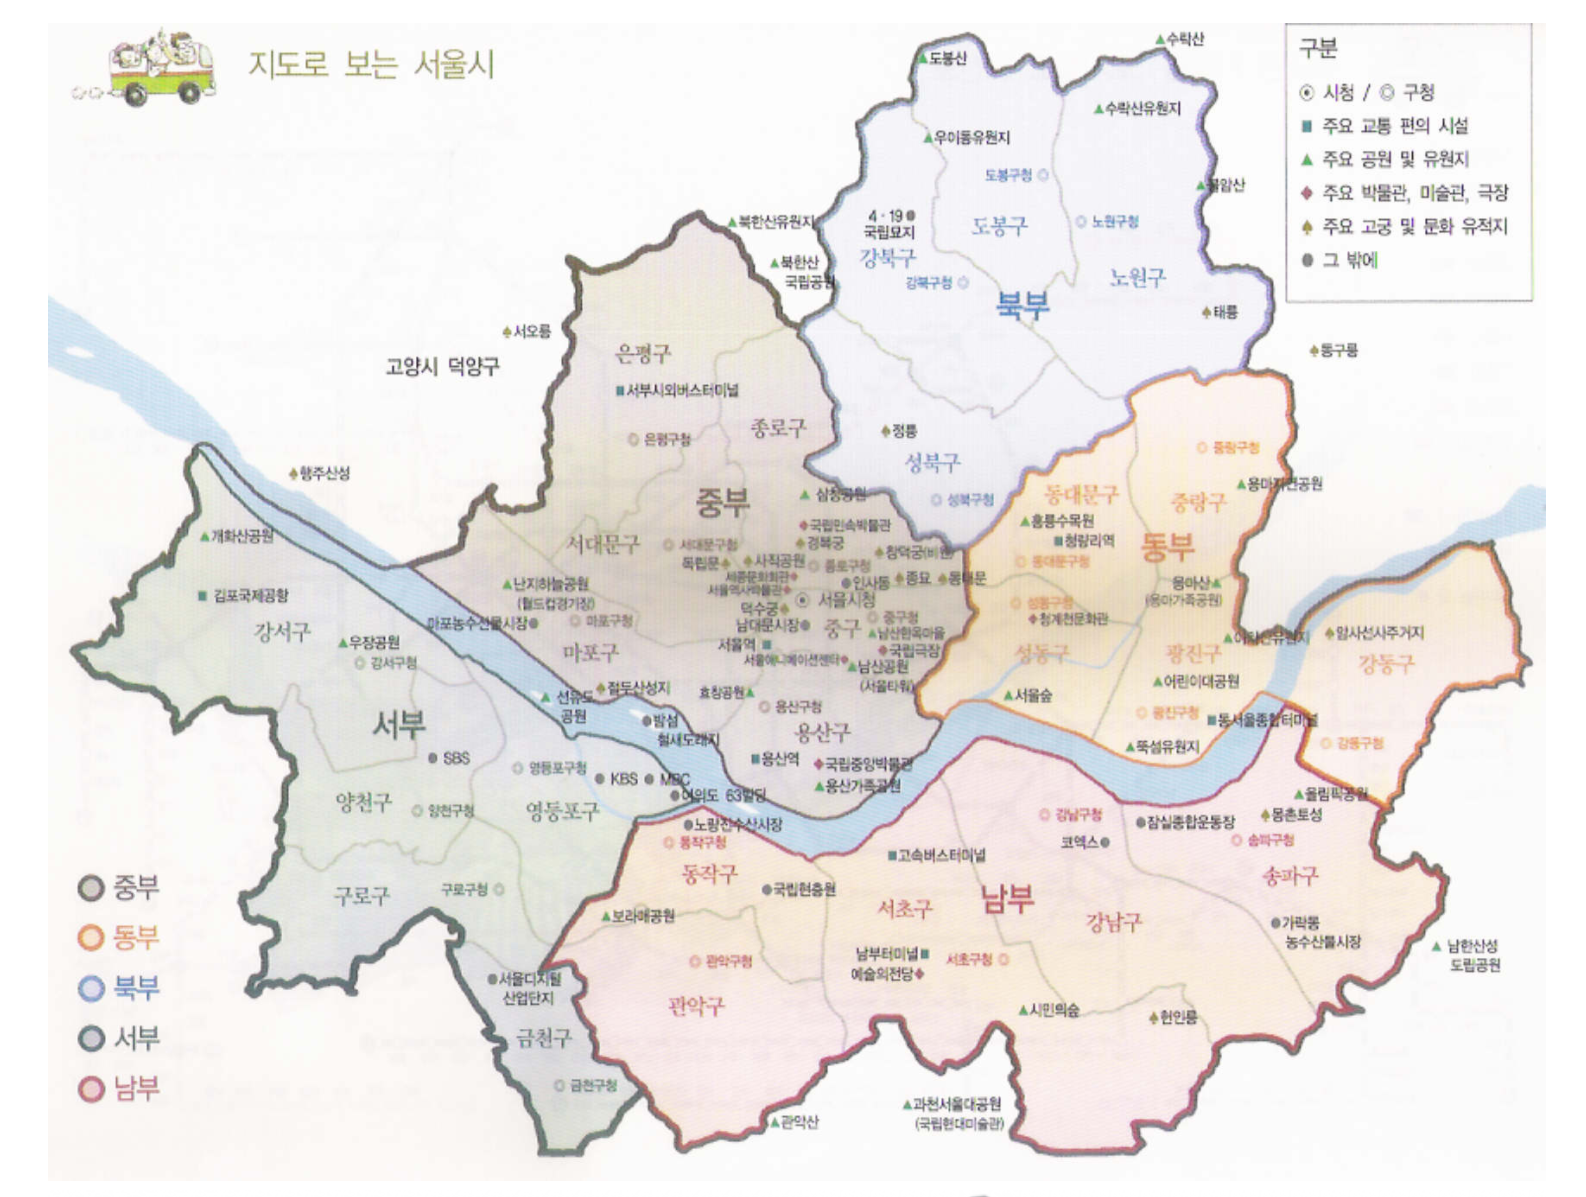

### Test2의 결과 해석

In [ ]:
test2.groupby(test2['test2_label']).size()

test2_label
-1     12097
 0       251
 1       396
 2      1136
 3       530
 4       861
 5       696
 6       130
 7       115
 8       103
 9       264
 10      121
dtype: int64

적은 곳은 129개, 많은 곳은 1209개까지 한 클러스터로 군집화 된 것을 알 수 있다

비교적 오래된 지도이긴하지만...  
위의 test2와 비교해서 보면 label은 할 때마다 바뀌어서 왼쪽부터 리스트업만 해보자면,  
김포공항 근처 / 구로 디지털단지 / 영등포구청 근처 / 여의도  
홍대 / 관악구청 근처 / 서울시청근처 / 종로구 인사동즈음  
강남구 클러스터 2개 / 서울숲 / 건국대 근처 / 잠실,송파  
이 지역들로 결과가 나온 것을 볼 수 있음  

오피스 상권 / 유흥?유휴 상권 두가지로 나눌 수 있을 것 같음.



### Test3 결과 해석

In [ ]:
test3.groupby(test3['test3_label']).size()

test3_label
-1    14465
 0      759
 1      178
 2      472
 3      215
 4      182
 5      262
 6       80
 7       87
dtype: int64

마포/홍대, 경복궁역, 
고속터미널, 신사, 교대,강남역, 역삼, 코엑스

### Test4 결과 해석

In [ ]:
test4.groupby(test4['test4_label']).size()

test4_label
-1    15655
 0      626
 1      160
 2      138
 3      121
dtype: int64

홍대주변, 고속터미널, 코엑스, 서초역?남부터미널?예술의전당쪽 근처

## 실루엣 분석을 통한 클러스터링 평가

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
test1.head()

상호명  지점명 시군구명                  지번주소         위도          경도  test1_label
3   우성커피숍       양천구   서울특별시 양천구 신월동 514-2  37.522055  126.842935           -1
4    카페클럽       송파구    서울특별시 송파구 문정동 43-6  37.488907  127.122480            0
5    띵낑커피       광진구    서울특별시 광진구 화양동 9-44  37.542182  127.068840            1
8   로얄커피숍       강동구   서울특별시 강동구 성내동 132-5  37.534901  127.124193            2
9  빈트리망원점  망원점  마포구  서울특별시 마포구 망원동 418-22  37.556041  126.899339            4

In [ ]:
score_samples = silhouette_samples(cafe[['위도','경도']],test1['test1_label'])
test1['silhouette_coef'] = score_samples
test1_sil = test1.groupby('test1_label')['silhouette_coef'].mean()
test1_sil

test1_label
-1    -0.855850
 0     0.776461
 1     0.025520
 2     0.323609
 3     0.101530
 4     0.340769
 5     0.580854
 6     0.553511
 7     0.095461
 8     0.691227
 9     0.357501
 10    0.815378
 11    0.419673
 12    0.633897
 13    0.573357
 14    0.669735
 15    0.782216
 16    0.606250
 17    0.519570
 18    0.537133
 19    0.519001
 20    0.660889
 21    0.384084
 22    0.610435
 23    0.259569
 24    0.514292
 25    0.743417
 26    0.802431
 27    0.528271
 28    0.555047
 29    0.608068
 30    0.773714
 31    0.575147
 32    0.770992
 33    0.819759
 34    0.783153
 35    0.690678
 36    0.637579
 37    0.681937
 38    0.533318
 39    0.724804
 40    0.809170
 41    0.860269
 42    0.773360
 43    0.689473
Name: silhouette_coef, dtype: float64

In [ ]:
test1_sil.mean()

0.552370244332585

In [ ]:
score_samples = silhouette_samples(cafe[['위도','경도']],test2['test2_label'])
test2['silhouette_coef'] = score_samples
test2_sil = test2.groupby('test2_label')['silhouette_coef'].mean()
test2_sil

test2_label
-1    -0.698489
 0     0.651186
 1     0.645047
 2     0.639115
 3     0.519340
 4     0.437184
 5     0.437895
 6     0.923276
 7     0.890479
 8     0.823670
 9     0.588762
 10    0.950089
Name: silhouette_coef, dtype: float64

In [ ]:
test2_sil.mean()

0.5672961273915048

In [ ]:
score_samples = silhouette_samples(cafe[['위도','경도']],test3['test3_label'])
test3['silhouette_coef'] = score_samples
test3_sil = test3.groupby('test3_label')['silhouette_coef'].mean()
test3_sil

test3_label
-1   -0.589175
 0    0.849397
 1    0.587748
 2    0.866877
 3    0.536991
 4    0.473488
 5    0.329233
 6    0.632878
 7    0.656540
Name: silhouette_coef, dtype: float64

In [ ]:
test3_sil.mean()

0.4826641746389247

In [ ]:
score_samples = silhouette_samples(cafe[['위도','경도']],test4['test4_label'])
test4['silhouette_coef'] = score_samples
test4_sil = test4.groupby('test4_label')['silhouette_coef'].mean()
test4_sil

test4_label
-1   -0.527871
 0    0.919460
 1    0.896929
 2    0.824040
 3    0.825033
Name: silhouette_coef, dtype: float64

In [ ]:
test4_sil.mean()

0.5875181247052419

label-1의 경우 노이즈로 판명되어 마이너스 값이 나오게 되는 것 같음.   
test4의 실루엣 계수 값이 제일 높게 나온 것을 확인할 수 있다.  
-> 최종 모형 test4..?

In [ ]:
print(test1_sil[1:].mean(),test2_sil[1:].mean(),test3_sil[1:].mean(),test4_sil[1:].mean())

0.5843752463866718 0.6823675122686843 0.6166440662839754 0.8663654690650593


노이즈라고 판명되는 label -1을 제외하고라도 test4의 실루엣 계수 값이 가장 높은 것을 확인할 수 있다.  
만약 Test4로 한다면 가장 오피스 상권에 가깝기 때문에 코엑스 주변으로 하는 것이 바람직하다고 생각됨.

In [ ]:
test4

상호명  지점명 시군구명  ...          경도  test4_label  silhouette_coef
3           우성커피숍       양천구  ...  126.842935           -1        -0.456270
4            카페클럽       송파구  ...  127.122480           -1        -0.560213
5            띵낑커피       광진구  ...  127.068840           -1        -0.683476
8           로얄커피숍       강동구  ...  127.124193           -1        -0.514801
9          빈트리망원점  망원점  마포구  ...  126.899339           -1        -0.792522
...           ...  ...  ...  ...         ...          ...              ...
20713  카페나무영우성균관대       종로구  ...  126.998001           -1        -0.324825
20714   에이스타커피컴퍼니       마포구  ...  126.937507           -1        -0.827177
20715          까치       종로구  ...  127.012784           -1        -0.421800
20716  cafscoffee       강남구  ...  127.053467           -1        -0.793418
20717         벨로샵       마포구  ...  126.922176            0         0.891220

[16700 rows x 8 columns]